# Imports

In [1]:

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import OneClassSVM
from sklearn.metrics import classification_report
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt


# a

In [2]:
X, y = make_classification(n_samples=100000, n_features=2, n_informative=2, n_redundant=0, n_repeated=0,
                           n_classes=2, n_clusters_per_class=1, weights=[0.995, 0.005], class_sep=0.5,
                           random_state=42)


In [3]:
X

array([[ 0.20496019, -0.83332072],
       [ 0.07550894, -0.97977055],
       [-0.88982104, -2.03202193],
       ...,
       [ 1.65947457,  0.75777432],
       [ 0.3809464 , -0.64008048],
       [ 1.07583323,  0.09938526]])

In [4]:
y

array([0, 0, 0, ..., 0, 0, 0])

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((80000, 2), (20000, 2), (80000,), (20000,))

# b

In [6]:
outlier_detector = OneClassSVM(nu=0.02, kernel='rbf', gamma='auto')
outlier_detector.fit(X_train)

OneClassSVM(gamma='auto', nu=0.02)

# C

In [7]:
pred = outlier_detector.predict(X_test)
pred

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [8]:
for i in range(pred.shape[0]):
    if pred[i] == 1:
        pred[i] = 0
    else:
        pred[i] = 1
pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [9]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     19787
           1       0.28      0.51      0.36       213

    accuracy                           0.98     20000
   macro avg       0.64      0.75      0.68     20000
weighted avg       0.99      0.98      0.98     20000



# d

In [10]:
X_test.shape

(20000, 2)

In [11]:
y_test.shape

(20000,)

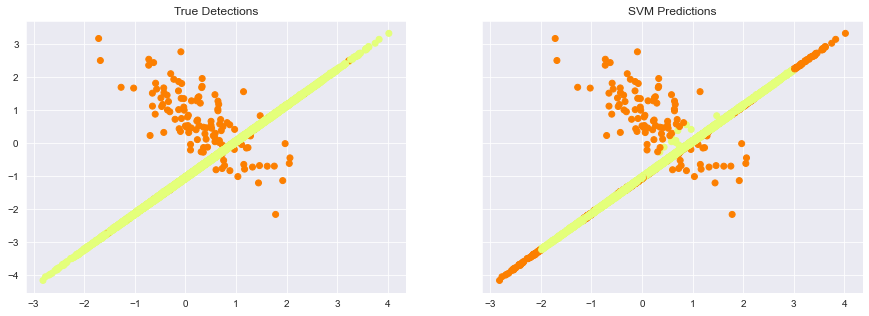

In [12]:

fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(15, 5))

ax1.set_title('True Detections')
ax1.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='Wistia')

# One-Class SVM Predictions
ax2.set_title('SVM Predictions')
ax2.scatter(X_test[:, 0], X_test[:, 1], c=pred, cmap='Wistia')